In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from cleanir.cleanir import Cleanir
from cleanir.tools.crop_face import *

Using TensorFlow backend.


# Getting started with setting paths
If you have model and/or datasets, you may put that path to variables below. 
Or you may put desired path to the variables below and download them in next cells.

- MODEL_PATH: CLEANIR model path.
- LFW_PATH: path of [LFW (Labeled Faces in the Wild)](http://vis-www.cs.umass.edu/lfw/) dataset for evaluation on de-identification.
- JAFFE_PATH: path of [JAFFE (Japaneses Female Facial Expression)](https://zenodo.org/record/3451524) dataset for evaluation on preserving facial attributes

In [2]:
MODEL_PATH = './model'
LFW_PATH = './data/lfw'
JAFFE_PATH = './data/jaffe'

# Prepare a sample image and face detector
Due to the fact that we use CNN based face detector, we should load the face detector model before loading the CLEANIR model.
If not, we will see the error that says "out of memory"

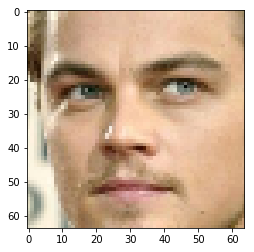

In [3]:
dsize = (64, 64)
img_path = './data/ld.jpg'
face_img = crop_face_from_file(img_path, dsize)
plt.imshow(face_img)

# Download CLEANIR model
Using the below cell's code, you may download CLEANIR model.
If you have the model already, you can skip this step.

In [4]:
from cleanir.tools.get_model import *
get_cleanir_model(MODEL_PATH)

Downloading...
From: https://drive.google.com/uc?id=1sEVj4hpM2xWEc3E3XWKMCOyv4HQv3zJI
To: /workspace/sdata/dclib/cleanir2/model/cleanir_model.zip
78.7MB [00:21, 3.62MB/s]


# Load the model
This is the necessary step to run cells below.

In [4]:
cleanir = Cleanir()
cleanir.load_models(MODEL_PATH)

Instructions for updating:
Colocations handled automatically by placer.


True

# Play with a sample image

In [5]:
deid = cleanir.get_deid_single_axis_func(face_img)
_ = interact(lambda d: plt.imshow(deid(d)), d=widgets.IntSlider(min=0, max=180, step=1, value=0))

interactive(children=(IntSlider(value=0, description='d', max=180), Output()), _dom_classes=('widget-interact'…

# Evaluation on de-identification
## Download the LFW dataset
Using the below cell's code, you may download the LFW dataset.
If you have the dataset already, you can skip that.

In [7]:
from cleanir.tools.get_dataset import *
download_lfw(LFW_PATH)

/usr/local/lib/python3.5/dist-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Run evaluation codes

In [6]:
from cleanir.evaluation_lfw import *
res = evaluate_id_lfw(LFW_PATH, cleanir)
df_res = pd.DataFrame(res)
df_res.reindex(columns=['threshold', 'original', '0', '30', '60', '90', '120', '150', '180'])

Reading LFW dataset pair information..


/usr/local/lib/python3.5/dist-packages/tqdm/autonotebook/__init__.py:18: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)



Loading FaceNet..
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loading and modifying LFW dataset images..



Thresholding..


,threshold,original,0,30,60,90,120,150,180
0,0.1,0.017333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.2,0.214667,0.014333,0.006667,0.000333,0.000000,0.000000,0.000000,0.000000
2,0.3,0.524000,0.110333,0.086667,0.014000,0.000000,0.000000,0.000000,0.000000
3,0.4,0.762667,0.340333,0.293333,0.100667,0.002000,0.000000,0.000000,0.000000
4,0.5,0.905333,0.599667,0.558667,0.309667,0.016667,0.000333,0.000000,0.000000
5,0.6,0.963333,0.797333,0.770667,0.576000,0.080000,0.001333,0.000000,0.000000
6,0.7,0.984000,0.911000,0.900000,0.791667,0.226333,0.011000,0.001000,0.000667
7,0.8,0.990333,0.964667,0.962333,0.920000,0.454333,0.046333,0.007667,0.005333
8,0.9,0.994000,0.985667,0.985000,0.970333,0.693333,0.123333,0.028667,0.020667
9,1.0,0.997667,0.995667,0.995333,0.991000,0.877333,0.284667,0.086333,0.062000


# Evaluation on preserving facial attributes
## Download the JAFFE dataset
Using the below cell's codes, you may download the JAFFE dataset.
If you have the dataset already, you can skip this step.

In [7]:
from cleanir.tools.get_dataset import *
download_jaffe(JAFFE_PATH)

## Put endpoint and key of the Azure API  
If you want to use the [Azure Face API](https://azure.microsoft.com/en-us/services/cognitive-services/face/), you should make an account and get endpoint and key.
Don't worry about the cost. They have free plan (20 transactions per minute, 30,000 transactions per a month).
Our evaluation needs 852 transactions. Therefore, the free plan is enough. But it will take a while.

In [8]:
ENDPOINT = ""
KEY = ""

## Run evaluation codes

In [ ]:
from cleanir.evaluation_jaffe import *
import seaborn as sn

cm_dict = evaluate_emotion_jaffe_azure(JAFFE_PATH, cleanir, ENDPOINT, KEY)
for k, v in cm_dict.items():
    sn.heatmap(v, annot=True, vmin=0, vmax=30, square=True, annot_kws={'size': 12}).set_title(k)
    plt.show()